**STEP-1 IMPORTING LIBRARIES**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.14.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**STEP-2 DATA PREPROCESSING**

In [4]:
#impoting the dataset
from google.colab import files
uploaded=files.upload()

Saving GOOG_test.csv to GOOG_test.csv
Saving GOOG_train.csv to GOOG_train.csv


In [5]:
training_data=pd.read_csv("/content/GOOG_train.csv")

In [6]:
training_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2014-11-03  27.698954  27.818624  27.585764  27.684992  27.684992  27645693
1  2014-11-04  27.574295  27.698954  27.389801  27.629642  27.629642  24884132
2  2014-11-05  27.763775  27.763775  27.128019  27.221264  27.221264  40645286
3  2014-11-06  27.200321  27.269382  26.974442  27.027796  27.027796  26665008
4  2014-11-07  27.235723  27.235723  26.859756  26.976437  26.976437  32675465

In [7]:
training_data.tail()

Date       Open       High        Low      Close  Adj Close  \
1230  2019-09-24  62.000000  62.337002  60.534000  60.938000  60.938000   
1231  2019-09-25  60.791000  62.415001  60.504501  62.326000  62.326000   
1232  2019-09-26  62.098000  62.250000  61.613400  62.069500  62.069500   
1233  2019-09-27  62.150501  62.201000  60.722500  61.254501  61.254501   
1234  2019-09-30  61.048500  61.299999  60.615002  60.950001  60.950001   

        Volume  
1230  31664000  
1231  29060000  
1232  30760000  
1233  27078000  
1234  28082000

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [9]:
training_set=training_data.iloc[:, 1:2].values

In [10]:
training_set.shape, training_data.shape

((1235, 1), (1235, 7))

In [11]:
#feature scaling
#using normalization

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.07772907],
       [0.07453556],
       [0.07938964],
       ...,
       [0.95896011],
       [0.96030508],
       [0.93207413]])

In [13]:
#creating a data structure with 60 timestamps and 1 output
x_train=[]
y_train=[]

for i in range(60,1235):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

#converting x_train and y_train into numpy araay
x_train, y_train=np.array(x_train),np.array(y_train)

In [14]:
x_train

array([[0.07772907, 0.07453556, 0.07938964, ..., 0.04511731, 0.03593291,
        0.02088529],
       [0.07453556, 0.07938964, 0.06495514, ..., 0.03593291, 0.02088529,
        0.02709341],
       [0.07938964, 0.06495514, 0.06586206, ..., 0.02088529, 0.02709341,
        0.04736551],
       ...,
       [0.77999352, 0.79942466, 0.79992421, ..., 0.93851701, 0.95644956,
        0.92547753],
       [0.79942466, 0.79992421, 0.80936441, ..., 0.95644956, 0.92547753,
        0.95896011],
       [0.79992421, 0.80936441, 0.79223887, ..., 0.92547753, 0.95896011,
        0.96030508]])

In [15]:
y_train

array([0.02709341, 0.04736551, 0.04260086, ..., 0.95896011, 0.96030508,
       0.93207413])

In [16]:
x_train.shape

(1175, 60)

In [17]:
#reshaping the dataset
x_train=x_train.reshape(1175,60,1)


In [18]:
x_train.shape

(1175, 60, 1)

**STEP-3 BUILDING LSTM**

In [19]:
#define an object(initialize the RNN)
model=tf.keras.models.Sequential()

In [20]:
#1st LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True, input_shape=(60,1)))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#2nd LSTM layer
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#3rd LSTM layer
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

#4th LSTM layer
model.add(tf.keras.layers.LSTM(units=120,activation='relu'))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))



In [21]:
#output layer
model.add(tf.keras.layers.Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

**STEP-4 TRAIN THE MODEL**

In [24]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
37/37 [==============================] - 9s 129ms/step - loss: 0.0631
Epoch 2/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0089
Epoch 3/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0059
Epoch 4/100
37/37 [==============================] - 5s 128ms/step - loss: 0.0057
Epoch 5/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0054
Epoch 6/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0055
Epoch 7/100
37/37 [==============================] - 4s 121ms/step - loss: 0.0056
Epoch 8/100
37/37 [==============================] - 4s 106ms/step - loss: 0.0044
Epoch 9/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0046
Epoch 10/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 11/100
37/37 [==============================] - 4s 113ms/step - loss: 0.0041
Epoch 12/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0045
Epoch 13/100
3

**STEP-5 MAKING PREDICTIONS**

In [26]:
#getting the real stocks prices fro Nov 2019
test_data=pd.read_csv("/content/GOOG_test.csv")

In [27]:
test_data.shape

(251, 7)

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [29]:
real_stock_price= test_data.iloc[:, 1:2].values

In [30]:
real_stock_price

array([[50.828499],
       [52.049999],
       [51.629501],
       [53.575001],
       [53.8055  ],
       [54.0825  ],
       [53.382999],
       [53.159   ],
       [52.346001],
       [52.508499],
       [54.      ],
       [53.973499],
       [55.      ],
       [54.400002],
       [53.8675  ],
       [53.824001],
       [54.25    ],
       [54.005501],
       [53.633999],
       [53.421501],
       [55.150002],
       [55.619999],
       [55.632999],
       [56.242001],
       [56.9785  ],
       [55.208   ],
       [54.349998],
       [54.8475  ],
       [55.34    ],
       [56.2495  ],
       [55.9025  ],
       [56.504002],
       [55.5     ],
       [55.9995  ],
       [55.542   ],
       [55.044998],
       [55.799999],
       [55.287498],
       [55.3475  ],
       [55.564999],
       [56.244999],
       [57.349499],
       [57.502998],
       [58.1245  ],
       [57.785999],
       [56.336498],
       [57.2225  ],
       [58.912998],
       [60.032249],
       [59.725498],


In [31]:
real_stock_price.shape

(251, 1)

In [32]:
#getting the real stocks prices fro Nov 2019

#concatenation
dataset_total=pd.concat((training_data['Open'], test_data['Open']), axis=0)

#stock prics for previous 60 days for each day of Nov 2019
inputs= dataset_total[len(dataset_total)-len(test_data)-60:].values


#reshape(convert into numpy array)
inputs=inputs.reshape(-1,1)

#feature scaling
inputs=sc.transform(inputs)

#creating a test set
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60 : i, 0])

#convert into numpy array
x_test=np.array(x_test)

#convert into 3D(required to process)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#getting predicted stock prices
predicted_stock_price=model.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 543ms/step


**STEP-6 VISUALIZING THE DATA RESULTS**

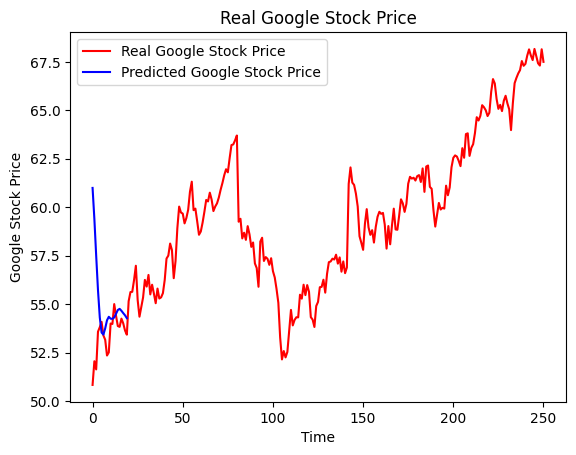

In [33]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Real Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()